In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_26531_Z')

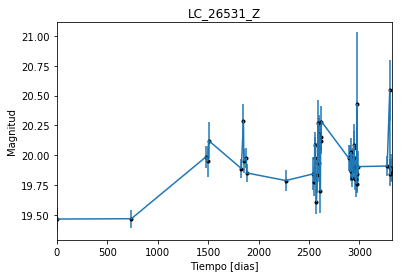

In [2]:
data = np.genfromtxt('LC_26531_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_26531_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

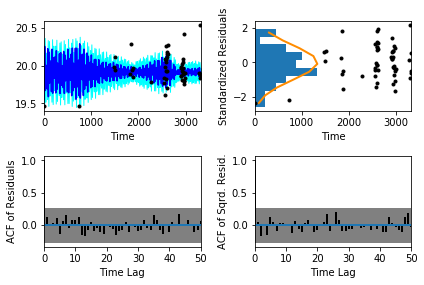

In [5]:
sample.assess_fit()

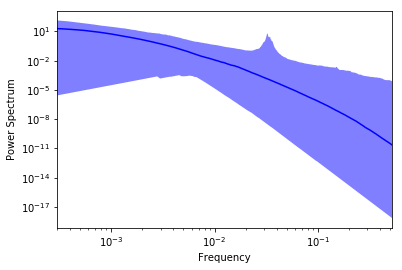

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_26531_Z')

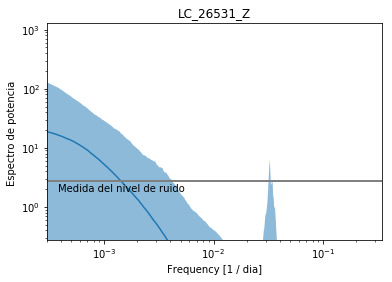

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_26531_Z')

Text(0.5,1,'Prediccion , valor esperado LC_26531_Z')

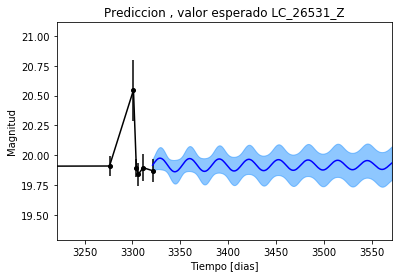

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_26531_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_26531_Z')

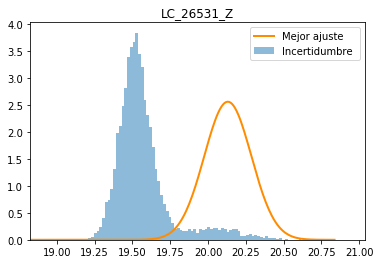

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_26531_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_26531_Z')

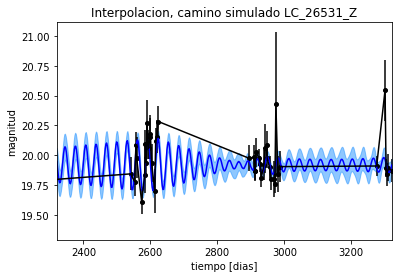

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_26531_U')

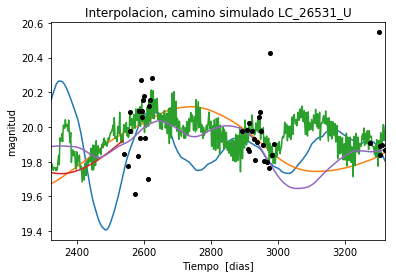

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1058.00800975
Median: 0.00929523364935
Standard deviation: 0.197582651971
68% credibility interval: [ 0.00071359  0.18078598]
95% credibility interval: [  3.42851604e-04   8.02122130e-01]
99% credibility interval: [  3.08724347e-04   9.84815475e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1049.54830853
Median: 0.00180528400509
Standard deviation: 0.0865638870031
68% credibility interval: [ 0.00044503  0.02988185]
95% credibility interval: [ 0.00032299  0.26416522]
99% credibility interval: [  3.06121900e-04   5.96337852e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 318.523642369
Median: 0.024493303817
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 554.620302291
Median: 44.2268486363
Standard deviation: 1.649520955
68% credibility interval: [ 42.48458167  45.38635912]
95% credibility interval: [ 40.04600383  46.61196253]
99% credibility interval: [ 38.23823389  48.72787928]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 548.85490702
Median: 0.826312195061
Standard deviation: 2.35303814263
68% credibility interval: [ 0.06374824  4.44257945]
95% credibility interval: [ 0.01495042  7.92830987]
99% credibility interval: [  9.88145525e-03   1.10691480e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1251.6683594
Median: 0.601882612437
Standard deviation: 10.0703714871
68% credibility interval: [ 0.02087543  9.15186381]
95% credibility interval: [  8.397

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2656.0429515
Median: 3.54820923224e-28
Standard deviation: 9.95907348656e+106
68% credibility interval: [  3.33997062e-60   5.23356294e-02]
95% credibility interval: [  7.64524617e-142   1.94801905e+082]
99% credibility interval: [  5.41698376e-154   7.79832541e+099]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2204.9545874
Median: 19.8223858791
Standard deviation: 0.119609447817
68% credibility interval: [ 19.70061697  19.91284573]
95% credibility interval: [ 19.5351266   20.00300599]
99% credibility interval: [ 19.37920312  20.12660947]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 707.096965075
Median: 0.0279372519273
Standard deviation: 0.256183717842
68% credibility interval: [ 0.          0.34904318]
95% credibility interval: [ 0.          0.93395604]
99% credibility interval: [ 0.          1.01589514]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 707.096965075
Median: 0.0279372519273
Standard deviation: 0.256183717842
68% credibility interval: [ 0.          0.34904318]
95% credibility interval: [ 0.          0.93395604]
99% credibility interval: [ 0.          1.01589514]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 607.452739786
Median: 0.0
Standard deviation: 0.00646527477444
68% cre

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 554.620302291
Median: 44.2268486363
Standard deviation: 1.649520955
68% credibility interval: [ 42.48458167  45.38635912]
95% credibility interval: [ 40.04600383  46.61196253]
99% credibility interval: [ 38.23823389  48.72787928]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1390.6627249
Median: 0.0473737276448
Standard deviation: 0.0588334994611
68% credibility interval: [ 0.02647051  0.09647424]
95% credibility interval: [ 0.01537834  0.2155001 ]
99% credibility interval: [ 0.01114095  0.35584884]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2099.93089179
Median: 1.1193088558
Standard deviation: 0.180188863053
68% credibility interval: [ 0.96264452  1.31016151]
95% credibility interval: [ 0.82621507  1.5389362 ]
99% credibility interval: [ 0.75890516  1.6975895 ]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1250.68064687
Median: 0.000147301211008
Standard deviation: 0.249900017787
68% credibility interval: [  1.09153422e-07   1.24458265e-02]
95% credibility interval: [  7.21581144e-84   2.87636468e-01]
99% credibility interval: [  1.12578552e-103   1.38286371e+000]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1058.00800975
Median: (-0.0584036754924-1.49158860903j)
Standard deviation: 2.03277311996
68% credibility interval: [-1.13591181-1.11916955j -0.00448364-1.11338895j]
95% credibility interval: [ -5.03988198e+00+0.j          -2.15420016e-03-0.00391407j]
99% credibility interval: [ -6.18777812e+00+0.j          -1.93977228e-03-0.20551233j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1049.54830853
Median: (-0.011342933936+0.561764674094j)
Standard deviation: 1.69905746597
68% credibility interval: [-0.18775318+0.57531892j -0.00279621+0.j        ]
95% credibility interval: [-1.65979902+5.47979683j -0.00202940+0.j        ]
99% credibility interval: [ -3.74690123e+00+1.21943449j  -1.92342063e-03+0.j        ]
Posterior summ